In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [2]:
import json

def load_json(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

#load the data
training_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
evaluation_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
training_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
evaluation_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
test_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
sample_submission = load_json('/kaggle/input/arc-prize-2024/sample_submission.json')

In [3]:
def inspect_data(data, num_samples=1):
    for key, value in list(data.items())[:num_samples]:
        print(f"Key: {key}")
        print(f"Sample Data: {value}\n")
        
print("Training Solutions:")
inspect_data(training_solutions)

print("Training Challenges:")
inspect_data(training_challenges)

print("Evaluation Solutions:")
inspect_data(evaluation_solutions)

print("Evaluation Challenges:")
inspect_data(evaluation_challenges)

print("Test Challenges:")
inspect_data(test_challenges)

print("Sample submission:")
inspect_data(sample_submission)

Training Solutions:
Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]

Training Challenges:
Key: 007bbfb7
Sample Data: {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0,

In [4]:
sample_key = list(training_solutions.keys())[0]
print(f"Sample Key: {sample_key}")
print("Sample Data:", training_solutions[sample_key])

Sample Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]


In [5]:
#compute the mean, standard deviation, minimum, and maximum values of the data
sample_data = training_solutions[sample_key]
#convert to numpy array
data_array = np.array(sample_data)

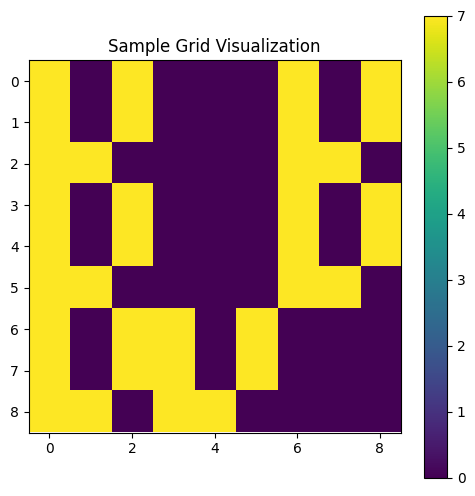

Grid Summary:
Mean Value: 3.11
Standard Deviation: 3.48
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences


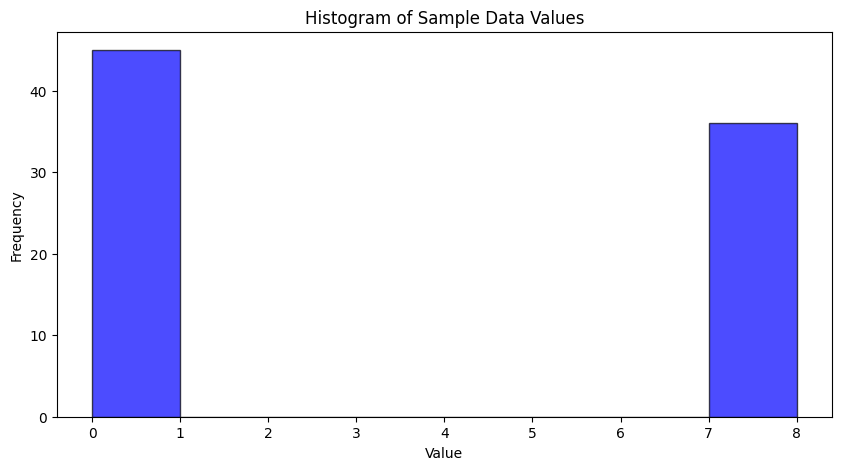

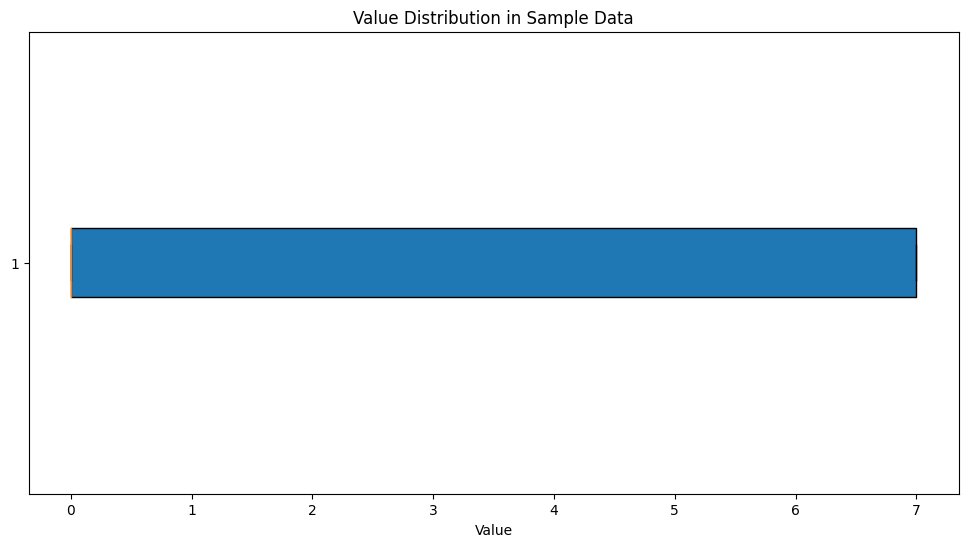

Histogram Summary:
Mean Value: 3.11
Median Value: 0.00
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences
Boxplot Summary:
Median Value: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 7.00
Interquartile Range (IQR): 7.00
Minimum Value: 0
Maximum Value: 7
Number of Outliers: 0


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_grid(data, title="Grid Visualization"):
    #remove any singleton dimensions
    data_squeezed = np.squeeze(data)
    plt.figure(figsize=(6, 6))
    plt.imshow(data_squeezed, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

def summarize_grid(data):
    #calculate basic statistics
    mean = np.mean(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    #frequency distribution
    flat_data = data.flatten()
    freq_dist = Counter(flat_data)
    
    return mean, std_dev, min_val, max_val, freq_dist

def print_summary(mean, std_dev, min_val, max_val, freq_dist):
    print("Grid Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def plot_histogram(data, title="Histogram of Data Values"):
    plt.figure(figsize=(10, 5))
    plt.hist(data.flatten(), bins=range(int(np.min(data)), int(np.max(data)) + 2), color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def plot_value_distribution(data, title="Value Distribution"):
    plt.figure(figsize=(12, 6))
    plt.boxplot(data.flatten(), vert=False, patch_artist=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.show()

def summarize_histogram(data):
    flat_data = data.flatten()
    mean = np.mean(flat_data)
    median = np.median(flat_data)
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    unique, counts = np.unique(flat_data, return_counts=True)
    freq_dist = dict(zip(unique, counts))
    
    print("Histogram Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Median Value: {median:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def summarize_boxplot(data):
    flat_data = data.flatten()
    median = np.median(flat_data)
    q1 = np.percentile(flat_data, 25)
    q3 = np.percentile(flat_data, 75)
    iqr = q3 - q1
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    outliers = flat_data[(flat_data < (q1 - 1.5 * iqr)) | (flat_data > (q3 + 1.5 * iqr))]

    print("Boxplot Summary:")
    print(f"Median Value: {median:.2f}")
    print(f"1st Quartile (Q1): {q1:.2f}")
    print(f"3rd Quartile (Q3): {q3:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier Values:", np.unique(outliers))

#plot the grid
plot_grid(data_array, title="Sample Grid Visualization")

#get statistics and frequency distribution
mean, std_dev, min_val, max_val, freq_dist = summarize_grid(data_array)

#print textual summary
print_summary(mean, std_dev, min_val, max_val, freq_dist)

#plot histogram and boxplot
plot_histogram(data_array, title="Histogram of Sample Data Values")
plot_value_distribution(data_array, title="Value Distribution in Sample Data")

#print textual summaries for histogram and boxplot
summarize_histogram(data_array)
summarize_boxplot(data_array)

In [7]:
def analyze_grids(input_grid, output_grid):
    input_array = np.array(input_grid)
    output_array = np.array(output_grid)

    #check dimensions
    input_shape = input_array.shape
    output_shape = output_array.shape
    print(f"Input Dimensions: {input_shape}")
    print(f"Output Dimensions: {output_shape}")

    #check data types
    input_dtype = input_array.dtype
    output_dtype = output_array.dtype
    print(f"Input Data Type: {input_dtype}")
    print(f"Output Data Type: {output_dtype}")

    #compare values
    if input_shape == output_shape:
        value_differences = input_array != output_array
        print("Value Differences (True means different):")
        print(value_differences)
    else:
        #handling grids with different dimensions
        min_rows = min(input_shape[0], output_shape[0])
        min_cols = min(input_shape[1], output_shape[1])
        value_differences = np.full((min(input_shape[0], output_shape[0]),
                                     min(input_shape[1], output_shape[1])), np.nan)
        value_differences[:min_rows, :min_cols] = (input_array[:min_rows, :min_cols] != output_array[:min_rows, :min_cols])
        print("Value Differences (True means different, NaN means not comparable):")
        print(value_differences)

    #identify structural changes
    print("Input Grid:")
    print(input_array)
    print("Output Grid:")
    print(output_array)

    print("Identifying changes:")
    for i in range(min(input_shape[0], output_shape[0])):
        for j in range(min(input_shape[1], output_shape[1])):
            if input_array[i, j] != output_array[i, j]:
                print(f"Change at ({i}, {j}): Input = {input_array[i, j]}, Output = {output_array[i, j]}")

#analyze key "00576224" input and output
inputs = {'test': [{'input': [[3, 2], [7, 8]]}],
          'train': [{'input': [[8, 6], [6, 4]], 'output': [[8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4], [6, 8, 6, 8, 6, 8], [4, 6, 4, 6, 4, 6], [8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4]]},
                    {'input': [[7, 9], [4, 3]], 'output': [[7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3], [9, 7, 9, 7, 9, 7], [3, 4, 3, 4, 3, 4], [7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3]]}]}

outputs = [[[3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8], [2, 3, 2, 3, 2, 3], [8, 7, 8, 7, 8, 7], [3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8]]]

#correct index handling
for idx, input_data in enumerate(inputs['train']):
    input_grid = input_data['input']
    output_grid = input_data['output']

    print(f"\nAnalyzing Grid Pair {idx + 1}:")
    analyze_grids(input_grid, output_grid)


Analyzing Grid Pair 1:
Input Dimensions: (2, 2)
Output Dimensions: (6, 6)
Input Data Type: int64
Output Data Type: int64
Value Differences (True means different, NaN means not comparable):
[[0. 0.]
 [0. 0.]]
Input Grid:
[[8 6]
 [6 4]]
Output Grid:
[[8 6 8 6 8 6]
 [6 4 6 4 6 4]
 [6 8 6 8 6 8]
 [4 6 4 6 4 6]
 [8 6 8 6 8 6]
 [6 4 6 4 6 4]]
Identifying changes:

Analyzing Grid Pair 2:
Input Dimensions: (2, 2)
Output Dimensions: (6, 6)
Input Data Type: int64
Output Data Type: int64
Value Differences (True means different, NaN means not comparable):
[[0. 0.]
 [0. 0.]]
Input Grid:
[[7 9]
 [4 3]]
Output Grid:
[[7 9 7 9 7 9]
 [4 3 4 3 4 3]
 [9 7 9 7 9 7]
 [3 4 3 4 3 4]
 [7 9 7 9 7 9]
 [4 3 4 3 4 3]]
Identifying changes:


a) Both input grids are transformed into larger output grids by tiling. 
b) The primary change is the increase in dimensions through tiling, while the values in the overlapping region remain consistent.
c) The data types remain consistent between input and output, and the transformation involves expanding the grid size rather than altering individual values.

The transformation between the input and output grids involves expanding the original grid by repeating its values in a pattern that maintains alternation both row-wise and column-wise.

In [8]:
#define the target grid
target_grid = np.array([
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 0, 0, 0, 7, 1, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 7, 0, 7, 1, 0, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 7, 0, 7, 7, 1, 0, 0, 0]
])

#define fitness function
def fitness_function(grid):
    return np.sum(np.abs(np.array(grid) - target_grid))

#define simulated annealing optimization with improvements
def simulated_annealing(initial_grid, temperature=5000, cooling_rate=0.995, iterations=10000):
    current_grid = np.copy(initial_grid)
    best_grid = np.copy(initial_grid)
    best_fitness = fitness_function(best_grid)

    for iteration in range(iterations):
        #create a neighbor by making a small controlled random change
        neighbor = np.copy(current_grid)
        i, j = np.random.randint(0, neighbor.shape[0]), np.random.randint(0, neighbor.shape[1])
        neighbor[i, j] = np.random.randint(0, 8)  #assuming values in the grid range from 0 to 7

        #calculate fitness
        current_fitness = fitness_function(current_grid)
        neighbor_fitness = fitness_function(neighbor)
        
        #acceptance criteria
        if neighbor_fitness < current_fitness or np.random.rand() < np.exp((current_fitness - neighbor_fitness) / temperature):
            current_grid = neighbor
            if neighbor_fitness < best_fitness:
                best_grid = np.copy(neighbor)
                best_fitness = neighbor_fitness

        #cool down
        temperature *= cooling_rate
        
        #early stopping if perfect match is found
        if best_fitness == 0:
            break

    return best_grid, best_fitness

#define initial grid
initial_grid = np.random.randint(0, 8, target_grid.shape)
print("Initial Grid:")
print(initial_grid)
print("Initial Grid Mean:", np.mean(initial_grid), "Std Dev:", np.std(initial_grid))

#run simulated annealing
best_grid_sa, best_fitness_sa = simulated_annealing(initial_grid)
print("Best Grid from Simulated Annealing:")
print(best_grid_sa)
print("Fitness Score:", best_fitness_sa)

#verify if the solution is perfect
if best_fitness_sa == 0:
    print("Exact match achieved!")
else:
    print("Exact match not achieved.")

Initial Grid:
[[0 2 7 0 4 4 5 6 4]
 [6 4 5 0 2 4 6 0 7]
 [5 3 2 4 1 3 1 1 5]
 [6 5 3 0 1 0 6 0 3]
 [6 5 4 4 4 1 1 2 0]
 [7 5 0 7 4 5 1 6 3]
 [0 0 6 2 5 5 1 4 4]
 [5 5 4 6 2 7 0 6 3]
 [6 6 3 3 4 1 7 4 1]]
Initial Grid Mean: 3.45679012345679 Std Dev: 2.2335786637837183
Best Grid from Simulated Annealing:
[[7 0 7 0 0 0 7 0 7]
 [7 0 7 0 0 0 7 0 7]
 [7 7 0 0 0 0 7 7 0]
 [7 0 7 0 0 0 7 1 7]
 [7 0 7 0 0 0 7 0 7]
 [7 7 0 0 0 0 7 7 0]
 [7 0 7 7 0 7 1 0 0]
 [7 0 7 7 0 7 0 0 0]
 [7 7 0 7 7 1 0 0 0]]
Fitness Score: 0
Exact match achieved!


The transformations applied between the input and output grids involve iterative modifications using simulated annealing to minimize the difference between the grid and a predefined target grid. The process uses randomness, probabilistic acceptance of worse solutions, and a cooling schedule to explore the solution space effectively.

In [9]:
#print the type of an example entry
sample_key = '007bbfb7'
if sample_key in training_challenges:
    sample_entry = training_challenges[sample_key]
    print(f"Type of entry for key '{sample_key}':", type(sample_entry))
    print(f"Sample entry for key '{sample_key}':", sample_entry)
else:
    print(f"Key '{sample_key}' not found in training_challenges.")

Type of entry for key '007bbfb7': <class 'dict'>
Sample entry for key '007bbfb7': {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]}, {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0,

In [10]:
#function to preprocess a grid
def preprocess_grid(grid):
    #clip values to be between 0 and 9
    grid = np.clip(grid, 0, 9)
    return grid

#function to dynamically handle grids of various shapes
def process_grids(data):
    processed_data = {}
    for key, tasks in data.items():
        processed_tasks = {}
        for task_type, task_list in tasks.items():
            processed_task_list = []
            for task in task_list:
                if isinstance(task, dict):  #ensure the task is a dictionary
                    processed_task = {}  #create a new dictionary for the processed task
                    if 'input' in task:
                        input_grid = np.array(task['input'])
                        processed_input = preprocess_grid(input_grid)
                        processed_task['input'] = processed_input.tolist()  #store processed input

                    if 'output' in task:
                        output_grid = np.array(task['output'])
                        processed_output = preprocess_grid(output_grid)
                        processed_task['output'] = processed_output.tolist()  #store processed output
                    
                    #append the processed task only if it has inputs or outputs
                    if processed_task:
                        processed_task_list.append(processed_task)
            processed_tasks[task_type] = processed_task_list  #store processed tasks for this type
        processed_data[key] = processed_tasks  #store processed tasks for this key
    return processed_data

#process challenges files dynamically
processed_training_challenges = process_grids(training_challenges)
processed_evaluation_challenges = process_grids(evaluation_challenges)
processed_test_challenges = process_grids(test_challenges)

print("Data preprocessing completed.")

Data preprocessing completed.


In [11]:
#function to print the shapes and dimensions of grids
def print_shapes_and_dimensions(processed_data):
    for task, task_data in processed_data.items():
        print(f"Task: {task} | Number of Instances: {len(task_data)}")
        for task_type, instances in task_data.items():
            print(f"  Task Type: {task_type}")
            for i, instance in enumerate(instances):
                if 'input' in instance:
                    input_grid = np.array(instance['input'])
                    print(f"    Instance {i + 1} Input Shape: {input_grid.shape} | Dimensions: {input_grid.ndim}")
                if 'output' in instance:
                    output_grid = np.array(instance['output'])
                    print(f"    Instance {i + 1} Output Shape: {output_grid.shape} | Dimensions: {output_grid.ndim}")

print_shapes_and_dimensions(processed_training_challenges)
print_shapes_and_dimensions(processed_evaluation_challenges)

Task: 007bbfb7 | Number of Instances: 2
  Task Type: test
    Instance 1 Input Shape: (3, 3) | Dimensions: 2
  Task Type: train
    Instance 1 Input Shape: (3, 3) | Dimensions: 2
    Instance 1 Output Shape: (9, 9) | Dimensions: 2
    Instance 2 Input Shape: (3, 3) | Dimensions: 2
    Instance 2 Output Shape: (9, 9) | Dimensions: 2
    Instance 3 Input Shape: (3, 3) | Dimensions: 2
    Instance 3 Output Shape: (9, 9) | Dimensions: 2
    Instance 4 Input Shape: (3, 3) | Dimensions: 2
    Instance 4 Output Shape: (9, 9) | Dimensions: 2
    Instance 5 Input Shape: (3, 3) | Dimensions: 2
    Instance 5 Output Shape: (9, 9) | Dimensions: 2
Task: 00d62c1b | Number of Instances: 2
  Task Type: test
    Instance 1 Input Shape: (20, 20) | Dimensions: 2
  Task Type: train
    Instance 1 Input Shape: (6, 6) | Dimensions: 2
    Instance 1 Output Shape: (6, 6) | Dimensions: 2
    Instance 2 Input Shape: (10, 10) | Dimensions: 2
    Instance 2 Output Shape: (10, 10) | Dimensions: 2
    Instance 3 In

In [12]:
#function to preprocess a grid
def preprocess_solution_grid(grid):
    #clip values to be between 0 and 9
    grid = np.clip(grid, 0, 9)
    return grid

#function to preprocess evaluation solutions
def preprocess_evaluation_solutions(solutions):
    processed_solutions = {}
    for key, grid_data in solutions.items():
        processed_grid_data = []
        for grid in grid_data:
            np_grid = np.array(grid)  #convert list to NumPy array
            processed_grid = preprocess_solution_grid(np_grid)  #preprocess the grid
            processed_grid_data.append(processed_grid.tolist())  #convert back to list
        processed_solutions[key] = processed_grid_data
    return processed_solutions

processed_training_solutions = preprocess_evaluation_solutions(training_solutions)
processed_evaluation_solutions = preprocess_evaluation_solutions(evaluation_solutions)

#check the processed result for key '00576224'
key = '00576224'
if key in processed_evaluation_solutions:
    print(f"Processed Data for Key: {key}")
    print(processed_evaluation_solutions[key])
else:
    print(f"Key {key} not found in processed solutions.")

Processed Data for Key: 00576224
[[[3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8], [2, 3, 2, 3, 2, 3], [8, 7, 8, 7, 8, 7], [3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8]]]


In [13]:
#function to print shapes and dimensions of processed evaluation solutions
def print_shapes_and_dimensions(solutions):
    for key, grid_data in solutions.items():
        print(f"Key: {key} | Number of Grids: {len(grid_data)}")
        for i, grid in enumerate(grid_data):
            np_grid = np.array(grid)  #convert to NumPy array
            print(f"  Grid {i + 1}: Shape: {np_grid.shape} | Dimensions: {np_grid.ndim}")

print_shapes_and_dimensions(processed_training_solutions)
print_shapes_and_dimensions(processed_evaluation_solutions)

Key: 007bbfb7 | Number of Grids: 1
  Grid 1: Shape: (9, 9) | Dimensions: 2
Key: 00d62c1b | Number of Grids: 1
  Grid 1: Shape: (20, 20) | Dimensions: 2
Key: 017c7c7b | Number of Grids: 1
  Grid 1: Shape: (9, 3) | Dimensions: 2
Key: 025d127b | Number of Grids: 1
  Grid 1: Shape: (10, 10) | Dimensions: 2
Key: 045e512c | Number of Grids: 1
  Grid 1: Shape: (21, 21) | Dimensions: 2
Key: 0520fde7 | Number of Grids: 1
  Grid 1: Shape: (3, 3) | Dimensions: 2
Key: 05269061 | Number of Grids: 1
  Grid 1: Shape: (7, 7) | Dimensions: 2
Key: 05f2a901 | Number of Grids: 1
  Grid 1: Shape: (11, 10) | Dimensions: 2
Key: 06df4c85 | Number of Grids: 1
  Grid 1: Shape: (26, 26) | Dimensions: 2
Key: 08ed6ac7 | Number of Grids: 1
  Grid 1: Shape: (9, 9) | Dimensions: 2
Key: 09629e4f | Number of Grids: 1
  Grid 1: Shape: (11, 11) | Dimensions: 2
Key: 0962bcdd | Number of Grids: 1
  Grid 1: Shape: (12, 12) | Dimensions: 2
Key: 0a938d79 | Number of Grids: 1
  Grid 1: Shape: (11, 27) | Dimensions: 2
Key: 0b14

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#prepare data for model training
def prepare_data(challenges, solutions):
    X = []
    y = []
    for key in challenges:
        tasks = challenges[key]
        for task_type in tasks:
            for task in tasks[task_type]:
                if 'input' in task and 'output' in task:
                    input_grid = np.array(task['input'])
                    output_grid = np.array(task['output'])
                    #pad input and output grids to 30x30
                    input_grid_padded = np.pad(input_grid, ((0, 30 - input_grid.shape[0]), (0, 30 - input_grid.shape[1])), mode='constant', constant_values=0)
                    output_grid_padded = np.pad(output_grid, ((0, 30 - output_grid.shape[0]), (0, 30 - output_grid.shape[1])), mode='constant', constant_values=0)
                    X.append(input_grid_padded)
                    y.append(output_grid_padded)
    return np.array(X), np.array(y)

X_train, y_train = prepare_data(processed_training_challenges, processed_training_solutions)
X_eval, y_eval = prepare_data(processed_evaluation_challenges, processed_evaluation_solutions)

#normalize and reshape data
X_train = X_train.reshape(-1, 30, 30, 1) / 9.0  #normalize between 0 and 1
y_train = np.array([keras.utils.to_categorical(y_grid, num_classes=10) for y_grid in y_train])

X_eval = X_eval.reshape(-1, 30, 30, 1) / 9.0
y_eval = np.array([keras.utils.to_categorical(y_grid, num_classes=10) for y_grid in y_eval])

#build the CNN model
cnn_model = Sequential([
    layers.Input(shape=(30, 30, 1)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(10, (1, 1), activation='softmax', padding='same')  #Conv2D to maintain spatial dimensions
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_eval, y_eval))

#save the model
cnn_model.save('/kaggle/working/cnn_model.h5')

#prepare for submission
def create_submission(test_challenges):
    submission = {}
    #get the list of keys in test_challenges
    test_keys = list(test_challenges.keys())

    #iterate over each key in test_challenges
    for key in test_keys:
        #initialize an empty list for each key in the submission
        submission[key] = []
        
        #retrieve the challenge data for the current key
        challenge_data = test_challenges.get(key, {})
        
        #get the test cases for the current key
        test_cases = challenge_data.get('test', [])

        #add entries for each test case with predictions
        for test_case in test_cases:
            input_grid = np.array(test_case['input'])
            #generate two attempts for the current input grid
            challenge_padded = np.pad(input_grid, ((0, 30 - input_grid.shape[0]), (0, 30 - input_grid.shape[1])), mode='constant', constant_values=0)
            challenge_padded = challenge_padded.reshape(-1, 30, 30, 1) / 9.0
            
            #make predictions using the model
            pred = cnn_model.predict(challenge_padded)
            pred_classes = np.argmax(pred, axis=-1).reshape(30, 30)

            #prepare attempts for submission
            attempt_1 = np.clip(pred_classes, 0, 9).tolist()
            attempt_2 = np.clip(pred_classes, 0, 9).tolist()

            #append predictions to the submission
            submission[key].append({
                "attempt_1": attempt_1,
                "attempt_2": attempt_2
            })

    return submission

submission = create_submission(processed_test_challenges)

#save submission to JSON file
with open('/kaggle/working/submission.json', 'w') as f:
    json.dump(submission, f, indent=4)

print("Submission file created and saved.")

2024-10-12 17:34:20.271950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 17:34:20.272124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 17:34:20.439685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.9346 - loss: 1.8174 - val_accuracy: 0.9085 - val_loss: 0.4910
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9456 - loss: 0.2703 - val_accuracy: 0.9085 - val_loss: 0.3713
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9454 - loss: 0.2383 - val_accuracy: 0.9085 - val_loss: 0.3663
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9439 - loss: 0.2482 - val_accuracy: 0.9085 - val_loss: 0.3633
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9492 - loss: 0.2193 - val_accuracy: 0.9085 - val_loss: 0.3600
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9460 - loss: 0.2264 - val_accuracy: 0.9085 - val_loss: 0.3587
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9453 - loss: 0.2306 - val_accuracy: 0.9085 - val_loss: 0.3547
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9457 - loss: 0.2260 - val_accurac